# EFC 3 - Redes Neurais - IA048

## Aluno: Jitesh Ashok Manilal Vassaram, RA:175867

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = np.load('../EFC3/bloodmnist.npz')

In [3]:
TrainX = data["train_images"]
TrainY = data["train_labels"]
ValX = data["val_images"]
ValY = data["val_labels"]
TestX = data["test_images"]
TestY = data["test_labels"]

In [4]:
print(f'dados de treinamento: \n {len(TrainX[0])}')

print('--'*20)
print(f'\n {TrainX/255}')

dados de treinamento: 
 28
----------------------------------------

 [[[[0.98039216 0.8745098  0.80784314]
   [1.         0.89803922 0.83137255]
   [0.98431373 0.87058824 0.80784314]
   ...
   [1.         0.93333333 0.76470588]
   [0.98431373 0.90196078 0.7254902 ]
   [1.         0.91764706 0.74901961]]

  [[1.         0.89803922 0.82352941]
   [1.         0.89803922 0.82352941]
   [0.95686275 0.84313725 0.78039216]
   ...
   [0.99607843 0.90980392 0.75686275]
   [0.99607843 0.91372549 0.74509804]
   [1.         0.94901961 0.78823529]]

  [[1.         0.90588235 0.81568627]
   [1.         0.89019608 0.80392157]
   [0.93333333 0.82352941 0.74117647]
   ...
   [1.         0.91372549 0.79215686]
   [0.98431373 0.89803922 0.75294118]
   [1.         0.94901961 0.79607843]]

  ...

  [[0.91372549 0.8        0.6745098 ]
   [0.9372549  0.82352941 0.70588235]
   [0.96078431 0.85490196 0.7372549 ]
   ...
   [1.         0.88235294 0.78039216]
   [1.         0.88627451 0.78431373]
   [1.         

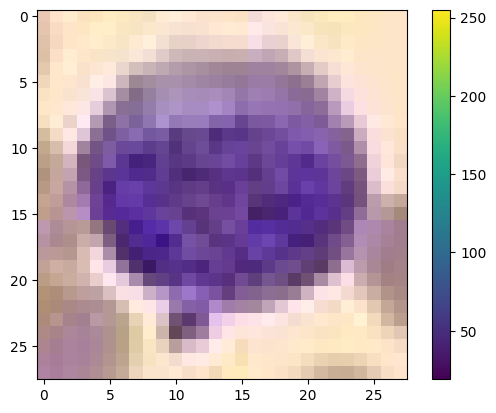

In [5]:
plt.imshow(TestX[0])
plt.colorbar()
plt.show()

In [6]:
TrainX_n = TrainX/255
TestX_n = TestX/255
ValX_n = ValX/255

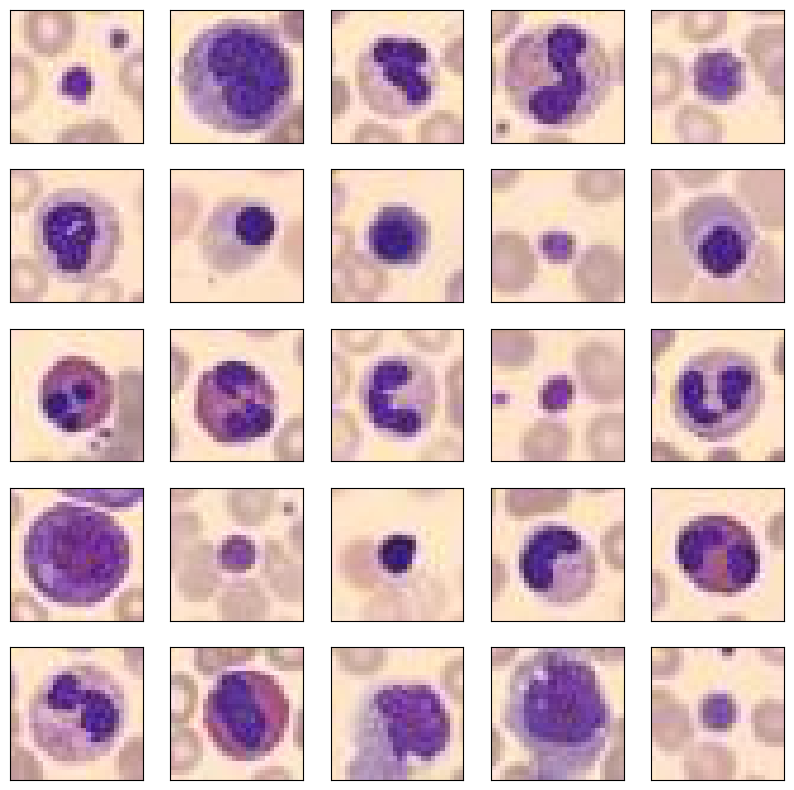

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(TrainX_n[i], cmap=plt.cm.binary)
    # plt.xlabel(class_names[TrainY[i]])
plt.show()

# Criação do modelo MLP

Será implementado uma MLP com uma camada intermediária de 128 neurônios e função de ativação *relu*. Para a camada de saída, foi adicionado uma função de ativação *softmax*.

In [8]:
# model = tf.keras.Sequential([
#     tf.keras.Input(shape=(28, 28, 3)),
#     tf.keras.layers.Flatten(),   # Camada de entrada
#     tf.keras.layers.Dense(128, activation='relu'),      # Camada intermediária
#     tf.keras.layers.Dense(8,activation='softmax')       # Camada de saída
# ])

# model.compile(optimizer='SGD',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# model.summary()

## Etapa de validação do modelo

Com o modelo indicado acima, será feito uma etapa de validação na qual o hiper-parâmetro que será avaliado é o *batch_size*

In [9]:
batchs_size = [8, 16, 32, 64, 128]
best_accuracy = 0
best_size = None

for batch_size in batchs_size:
    
   model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 3)),
    tf.keras.layers.Flatten(),   # Camada de entrada
    tf.keras.layers.Dense(128, activation='relu'),      # Camada intermediária
    tf.keras.layers.Dense(8,activation='softmax')       # Camada de saída
    ])
   
   model.compile(optimizer='SGD',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
   
   hist = model.fit(TrainX_n, TrainY, batch_size=batch_size, epochs=30, verbose=1, validation_data=(ValX_n, ValY), callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))

   val_acc = model.evaluate(ValX_n,ValY)

   print(f'Batch Size: {batch_size}, Acurácia da validação: {val_acc[1]}')

   if val_acc[1] > best_accuracy:
      best_accuracy = val_acc[1]
      best_size = batch_size


print(f'O melhor valor de Batch é: {best_size}, com uma acurácia de validação de {best_accuracy}')


Epoch 1/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.4130 - loss: 1.5367 - val_accuracy: 0.5491 - val_loss: 1.0513
Epoch 2/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.6156 - loss: 1.0347 - val_accuracy: 0.5970 - val_loss: 0.9608
Epoch 3/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.6506 - loss: 0.9366 - val_accuracy: 0.6507 - val_loss: 0.8810
Epoch 4/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.6846 - loss: 0.8535 - val_accuracy: 0.6893 - val_loss: 0.7811
Epoch 5/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - accuracy: 0.7026 - loss: 0.8230 - val_accuracy: 0.6752 - val_loss: 0.8301
Epoch 6/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.7164 - loss: 0.7921 - val_accuracy: 0.7652 - val_loss: 0.6463
Epoch 7/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.7366 - loss: 0.7424 - val_accuracy: 0.7161 - val_loss: 0.7490
Epoch 8/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.7348 -

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 3)),
    tf.keras.layers.Flatten(),   # Camada de entrada
    tf.keras.layers.Dense(128, activation='relu'),      # Camada intermediária
    tf.keras.layers.Dense(8,activation='softmax')       # Camada de saída
    ])
   
model.compile(optimizer='SGD',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])


model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       301,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 302,216 (1.15 MB)

 Trainable params: 302,216 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
hist = model.fit(TrainX_n, TrainY, batch_size=best_size, epochs=30, verbose=1, validation_data=(ValX_n, ValY), callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))

Epoch 1/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.4108 - loss: 1.5517 - val_accuracy: 0.6489 - val_loss: 0.9744
Epoch 2/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.6126 - loss: 1.0504 - val_accuracy: 0.6852 - val_loss: 0.8664
Epoch 3/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.6575 - loss: 0.9365 - val_accuracy: 0.6618 - val_loss: 0.9043
Epoch 4/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.6839 - loss: 0.8627 - val_accuracy: 0.7097 - val_loss: 0.7708
Epoch 5/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.7085 - loss: 0.8180 - val_accuracy: 0.7739 - val_loss: 0.6675
Epoch 6/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.7048 - loss: 0.7844 - val_accuracy: 0.7623 - val_loss: 0.6461
Epoch 7/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.7382 - loss: 0.7254 - val_accuracy: 0.7482 - val_loss: 0.7116
Epoch 8/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.7383 -

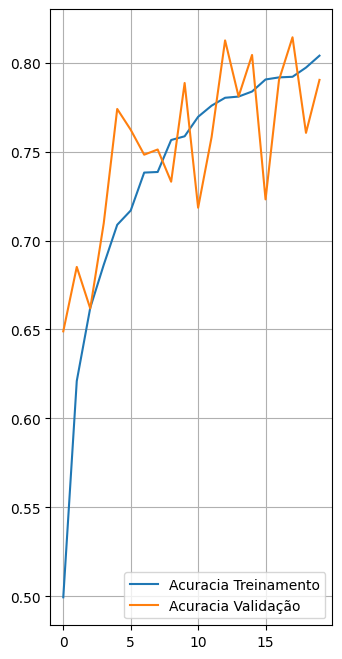

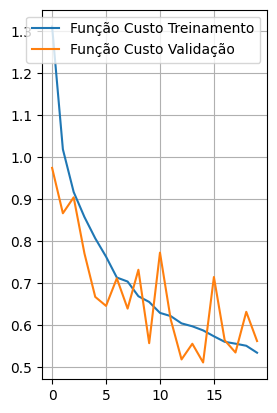

In [13]:
acc = hist.history['accuracy']
validation_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

range_epochs = np.arange(20)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range_epochs,acc, label='Acuracia Treinamento')
plt.plot(range_epochs,validation_acc, label='Acuracia Validação')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

plt.subplot(1,2,2)
plt.plot(range_epochs,loss, label='Função Custo Treinamento')
plt.plot(range_epochs,val_loss, label='Função Custo Validação')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [14]:
import itertools
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.7907 - loss: 71.5761
Função-Custo: 71.0071792602539
Acurácia: 0.7866120934486389
----------------------------------------------------------------------------------------------------


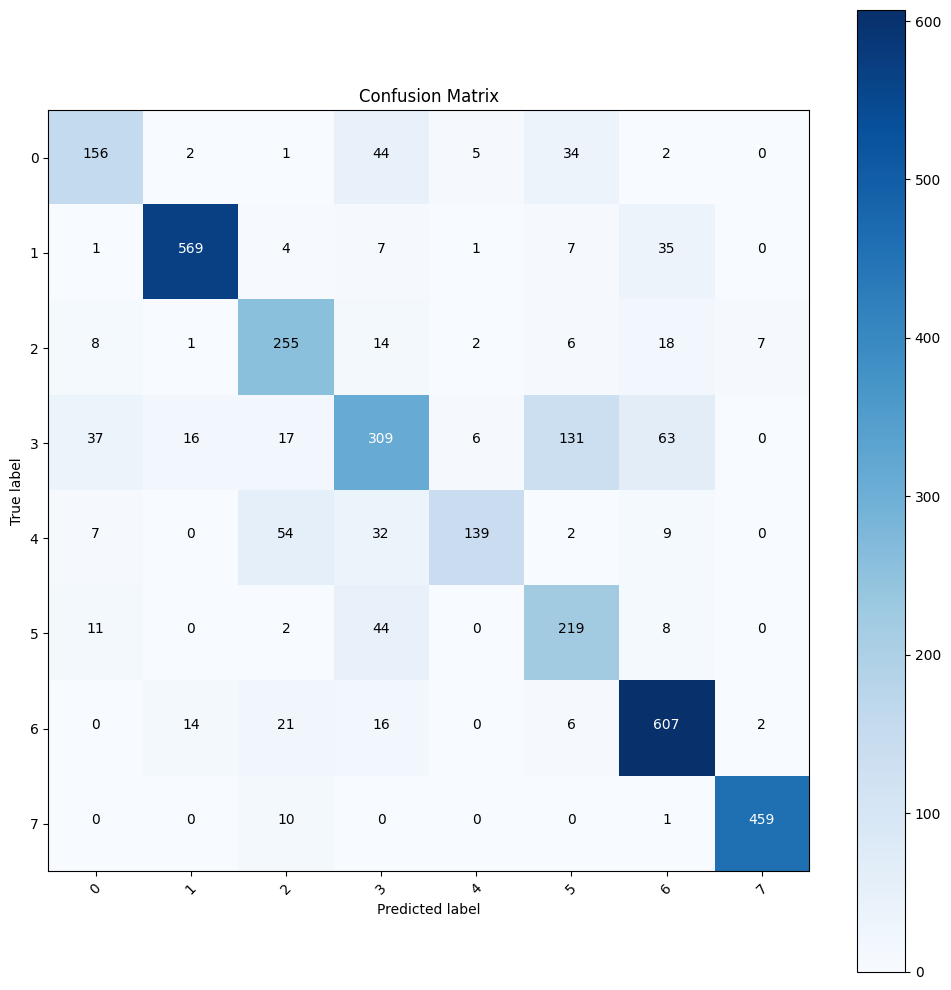

In [15]:
from sklearn.metrics import confusion_matrix
import pandas as pd

pred = model.predict(TestX_n)

y_pred = np.empty((len(pred),1),dtype=int)
for i in range(len(pred)):
    y_pred[i,0] = np.argmax(pred[i])

score = model.evaluate(TestX,TestY)

print(f'Função-Custo: {score[0]}')
print(f'Acurácia: {score[1]}')

print('--'*50)

cm = confusion_matrix(TestY,y_pred)
plot_confusion_matrix(cm, ['0', '1', '2', '3', '4', '5', '6', '7'], normalize=False, title='Confusion Matrix')

# confusionMatrix = pd.DataFrame(data=cm, index=['0,true', '1,true', '2,true', '3,true', '4,true', '5,true', '6,true', '7,true'], columns=['0, pred', '1, pred', '2, pred', '3, pred', '4, pred', '5, pred', '6, pred', '7, pred'])
# confusionMatrix.loc['sum'] = confusionMatrix.sum()
# confusionMatrix['sum'] = confusionMatrix.sum(axis=1)
# print(confusionMatrix)
# print('--'*50)

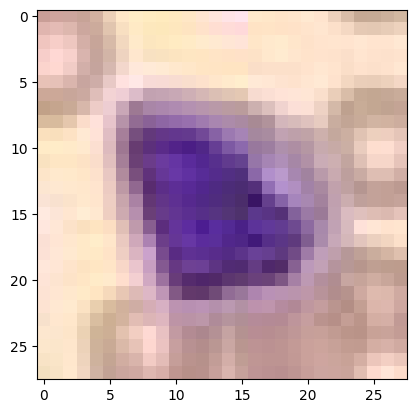

In [16]:
plt.imshow(TestX[3])
plt.show()

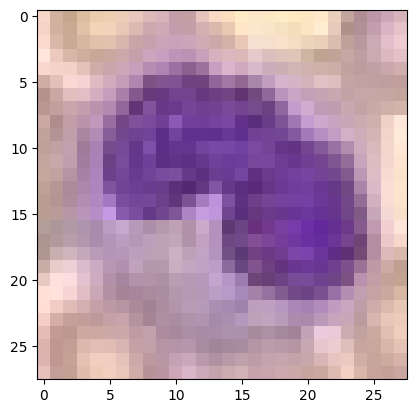

In [17]:
plt.imshow(TestX[10])
plt.show()